<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()   # load digit is a method
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
dir(digits)  # as per doc, its has 1797 samples, its contain the training set, all are 8x8 images

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[0]   # images are represented by 1D array (image 8x8 = 64) if count the output, it will be 64

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
digits.data[1]  # 8x8 = 64 

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

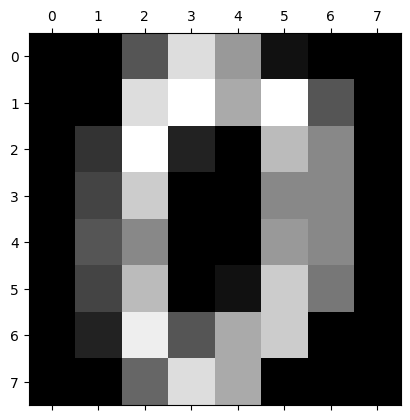

In [5]:
# Visualize the data
plt.gray()
plt.matshow(digits.images[0])  # data
plt.show()

<Figure size 640x480 with 0 Axes>

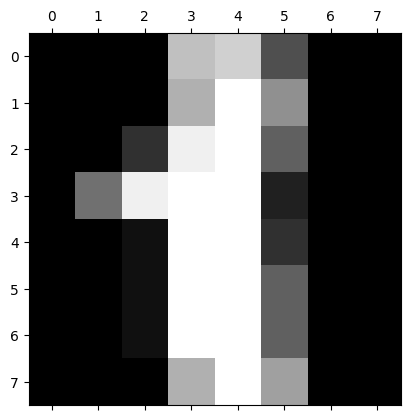

In [6]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

<Figure size 640x480 with 0 Axes>

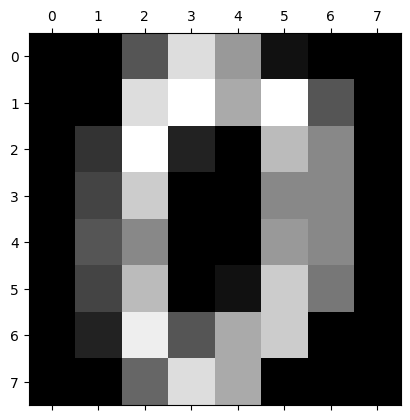

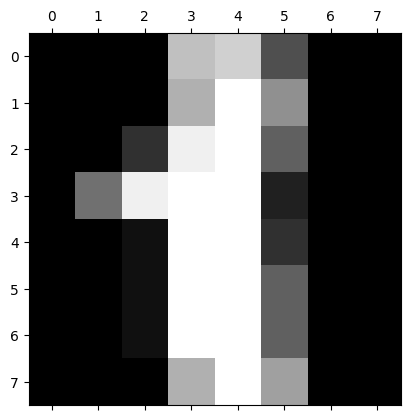

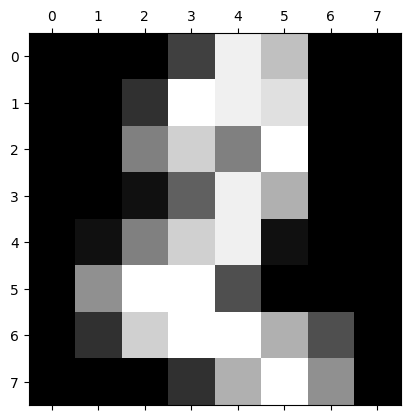

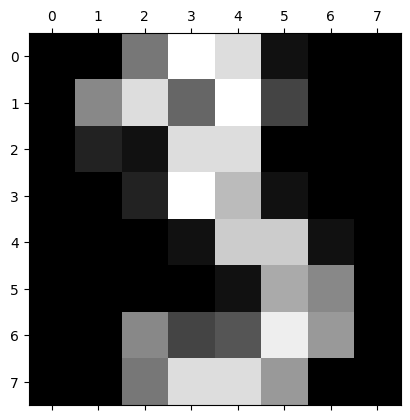

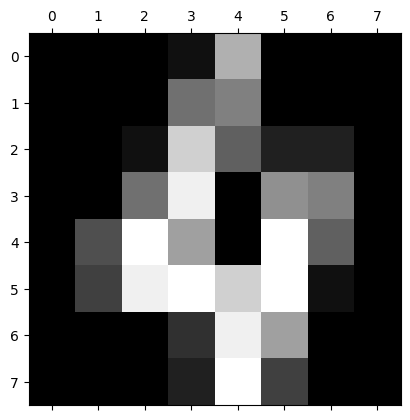

In [7]:
# See first 5 samples by loop
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])


In [8]:
# Printing Target   , here the corresponding target indicate the input shown in loop (0,4), last one is 4
digits.target[0:5]

array([0, 1, 2, 3, 4])

We can use data, data & target to TRAIN our model

### Train Model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.20)

In [10]:
print(f'Train Size :',len(X_train))
print(f'Test Size :',len(X_test))

Train Size : 1437
Test Size : 360


In [11]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train) # take always train data (x, y)

LogisticRegression()

In [12]:
# Score
model.score(X_test, y_test)

0.9666666666666667

# Prediction


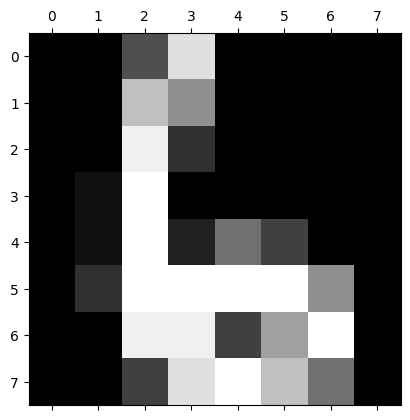

In [13]:
# have some random number
plt.matshow(digits.images[67])

In [14]:
# since the above image is dificult to recognize lets check & verify with by its associated targets (real number)
digits.target[67]

6

In [15]:
# lets predict data by created model , the model indenfy the chateract perfectly!
model.predict([digits.data[67]])

array([6])

- Not passed images, becasue image is binary data, model expect numerical data only
- passed corresponding index e.g 67

In [16]:
# Predict 0 to 5 - its its giving 100% accuracy to identify hand digit data
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

#### Facts

- Here model accuracy score is 97%, but its giving 100% at its real time prediction
- We need to know, failing area, that why need now we going to <b> Confusion Matrix </b>

- X_test: it mean it will calculate the y predicted values
- y_test; it is actual y_test  or real value (kept aside before train & testing the model) 

### Confusion Matrix

In [17]:
y_predicted = model.predict(X_test) # stored all predicted values for X_test 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0, 39,  0,  0],
       [ 0,  0,  0,  0,  1,  2,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 36]], dtype=int64)

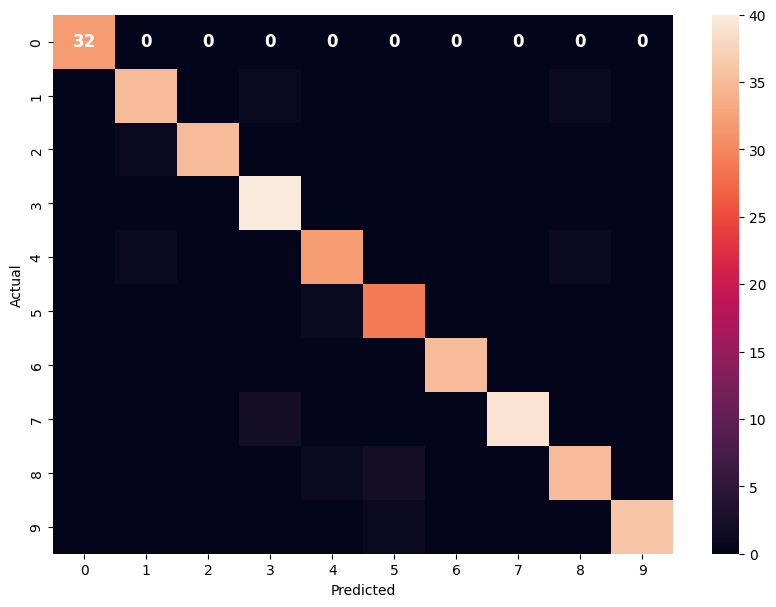

In [20]:
# Confusion Matrix Valualization
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={"color": "white", "size": 12, "weight": "bold"})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3 style="purple" alignment="left"> Ref </h3>

https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

<img height=300 width=300 src="iris_petal_sepal.png" />